
 <div style="background-color: olive; padding: 40px; font-size: 40px;">
             Zillow's Single Family Tax Assessment Model
    
    
</div>
  
  

## Project Overview / Goal:    

The goal of this project is to develop an accurate regression model for predicting property tax assessed values ('taxvaluedollarcnt') of Single Family Properties. By identifying and analyzing the primary drivers of property value, the project aims to enhance Zillow's existing model. Additionally, it seeks to provide valuable insights for more precise property valuation across various counties.

In [46]:
# Import Pandas for data manipulation 
import pandas as pd

# Import numpy for numerical operations
import numpy as np

# Import Matplotlib for data visualization 
import matplotlib.pyplot as plt

# Import Seaborn for enhanced plotting
import seaborn as sns

# Import feature selection tools
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# Import Linear Regression for modeling
from sklearn.linear_model import LinearRegression, TweedieRegressor  
# Import for preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Import train_test_split for model evaluation
from sklearn.model_selection import train_test_split

# Import R-squared (coefficient of determination) metric for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import scikit-learn preprocessing module for data preparation and feature engineering
import sklearn.preprocessing

# Import for LassoLars regression model
from sklearn.linear_model import LassoLars

# Import for DecisionTreeRegressor for decision tree-based regression
from sklearn.tree import DecisionTreeRegressor

# Import for mean_absolute_error metric to evaluate model performance
from sklearn.metrics import mean_absolute_error

# Import for RandomForestRegressor, an ensemble method for regression
from sklearn.ensemble import RandomForestRegressor

# Import for KNeighborsRegressor, a k-nearest neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

# Import for another instance of RandomForestRegressor, 
# possibly for comparison or ensemble use
from sklearn.ensemble import RandomForestRegressor

# Import warnings
import warnings
warnings.filterwarnings("ignore")

# User defined functions
import acquire as a

# User defined functions
import prepare as p

# Import statsmodels library
import statsmodels.api as sm  

# Import scipy.stats library
import scipy.stats as stats  

<div style="background-color: olive; padding: 20px; font-size: 20px;">
              Project Pipeline:-
    
<div style="background-color: rgba(255, 0, 0, 0.5);">- Plan --- Acquire --- Prepare --- Explore --- Model --- Deliver</div>
   
</div>
  

<div style="background: linear-gradient(to right, pink, lightgreen);">
    <strong style="font-size: 28px;">Plan</strong>
</div>


In [ ]:
What is the main objective of this machine learning project?
From where to obtain the data for this project?
What format is the data in, and what preprocessing steps are needed?
Are there any missing values or outliers that require attention?
Which features (variables) will be used as predictors in the models?
What types of machine learning models are suitable for the problem? (Linear, Nonlinear, etc.)
Linear:Linear Regression, Lasso Regression
Nonlinear:Decision Trees, Random Forests, Gradient Boosting,KNN    

<div style="background: linear-gradient(to right, pink, lightgreen);">
    <strong style="font-size: 28px;"> Acquire & Prepare</strong>
</div>


In [65]:
# Acquire and prepares data from properties_2017 and returns clean data frame
df = a.get_zillow_data()
df = p.prep_zillow(df)


 - The data for this project was acquired from the database zillow.
 -   The get_db_url function in env module constructs a MySQL database URL, which the get_zillow_data function from the acquire module uses to connect to the zillow database,fetchs the data, and returns it as a dataframe.

 - The dataset comprises of 2131283 rows and 10 columns.

 - Each observation in the Zillow dataset represents  a distinct real estate property.

 
 - Column Descriptions:
 | #   | Column     | Dtype    | Definition                                       |
| --- | ---------- | -------  | ------------------------------------------------ |
| 0   | bedrooms   | int64    | Number of bedrooms in the house                 |
| 1   | bathrooms  | float64  | Number of bathrooms in the house                |
| 2   | area       | int64    | Total square footage of the property            |
| 3   | taxvalue   | int64    | The assessed tax value based on property valuation|
| 4   | yearbuilt  | int64    | Year when the respective property was originally constructed |
| 5   | county     | object   | County where the property is located            |
| 6   | lotsqft    | int64    | Square footage of the property's lot            |
| 7   | la         | int64    | Indicator for properties in Los Angeles County  |
| 8   | orange     | int64    | Indicator for properties in Orange County       |
| 9   | ventura    | int64    | Indicator for properties in Ventura County      |


### SPLIT data

In [66]:
#Use user defined function to split data
train, validate, test = p.split_data(df)

train: 1491898 (70% of 2131283)
validate: 319692 (15% of 2131283)
test: 319693 (15% of 2131283)


<div style="background: linear-gradient(to right, pink, lightgreen);">
    <strong style="font-size: 28px;">Explore</strong>
</div>


## Questions Explored:

<div style="background-color: olive; padding: 15px; font-size: 15px;">
 <div style="background: linear-gradient(to right, pink, lightgreen);">
Question 1: What is the relationship between the square footage of a home, the number of bedrooms, and the number of bathrooms with the property's assessed value (taxvaluedollarcnt)?
</div> 
 <div style="background: linear-gradient(to right, pink, lightgreen);">    
Question 2: What are the key drivers of property value for single-family properties?
</div>
 <div style="background: linear-gradient(to right, pink, lightgreen);">    
Question 3: How does the number of bedrooms in residential properties influence their assessed tax values?
</div>
<div style="background: linear-gradient(to right, pink, lightgreen);">    
Question 4: Is having 1 bathroom worse for property value than having 2 bedrooms?
</div>

### Pearson Correlation Matrix

Correlation matrix calculation - to understand relationships between different features in the dataset for feature selection or modeling


In [16]:
# Select only numeric columns for correlation calculation
numeric_columns = train.select_dtypes(include=['number'])

# Calculate correlation
value_corr = numeric_columns.corr()
value_corr

,bedrooms,bathrooms,area,taxvalue,yearbuilt,lotsqft,la,orange,ventura
bedrooms,1.000000,0.642126,0.470483,0.253579,0.376545,0.003052,-0.162200,0.124945,0.082223
bathrooms,0.642126,1.000000,0.649160,0.498704,0.507344,0.010965,-0.140433,0.124860,0.043721
area,0.470483,0.649160,1.000000,0.473475,0.341123,0.012054,-0.105064,0.091853,0.035277
taxvalue,0.253579,0.498704,0.473475,1.000000,0.189434,0.010906,-0.050533,0.059759,-0.008687
yearbuilt,0.376545,0.507344,0.341123,0.189434,1.000000,0.009033,-0.372948,0.297510,0.172222
lotsqft,0.003052,0.010965,0.012054,0.010906,0.009033,1.000000,0.003499,-0.004602,0.001367
la,-0.162200,-0.140433,-0.105064,-0.050533,-0.372948,0.003499,1.000000,-0.831783,-0.405710
orange,0.124945,0.124860,0.091853,0.059759,0.297510,-0.004602,-0.831783,1.000000,-0.169901
ventura,0.082223,0.043721,0.035277,-0.008687,0.172222,0.001367,-0.405710,-0.169901,1.000000


In [24]:
correlation_matrix

,area,bedrooms,bathrooms,taxvalue
area,1.000000,0.477899,0.659447,0.482584
bedrooms,0.477899,1.000000,0.642084,0.256006
bathrooms,0.659447,0.642084,1.000000,0.502592
taxvalue,0.482584,0.256006,0.502592,1.000000


### Key Findings from correlation matrix:
 - Strong positive correlation between bedrooms and bathrooms.
 - Moderate positive correlation between bedrooms and  area.
 - Moderate positive correlation between bathrooms and area.
 - Positive correlation between bathrooms and yearbuilt.
 - Strong negative correlation between properties in LA and Orange County.
 - Negative correlation between properties in LA and Ventura County.
 - Negative correlation between properties in Orange County and Ventura County.

### Conclusion from correlation matrix:
 - The number of bedrooms and bathrooms tend to be positively related, meaning that properties with more bedrooms also tend to have more bathrooms.

 - There is also a positive correlation between the number of bathrooms and the property's area, indicating that larger properties tend to have more bathrooms.

 - Additionally, properties in Los Angeles (LA) County show a strong negative correlation with properties in Orange County and Ventura County, suggesting that they are distinct markets or regions with different property characteristics or prices.

### 1. Hypothesis Testing

Null Hypothesis 
(H0): There is no significant relationship between square footage, number of bedrooms, number of bathrooms, and property assessed value.
Alternative Hypothesis (H1): There is a significant relationship between at least one of these variables and property assessed value

In [20]:
import statsmodels.api as sm
# X represents the independent variables, and y represents the dependent variable
X = df[['area', 'bedrooms', 'bathrooms']]
X = sm.add_constant(X)  # Add a constant (intercept) to the model
y = df['taxvalue']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               taxvalue   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                 3.108e+05
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:54:00   Log-Likelihood:            -3.1228e+07
No. Observations:             2131283   AIC:                         6.246e+07
Df Residuals:                 2131279   BIC:                         6.246e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.153e+05   1412.128    -81.615      0.0

Conclusion:-
Based on the regression results and the low p-values, there is strong evidence to reject the null hypothesis (H0). The alternative hypothesis (H1) is supported, indicating that there is a significant relationship between at least one of these variables (area, bedrooms, bathrooms) and property assessed value.

<div style="background-color: rgba(255, 0, 0, 0.5);">Summary / Key Findings:
    
 - The model explains 30.4% of tax assessed value variance.
 - Larger homes (area) have higher tax values.
 - More bedrooms are associated with lower tax values.
 - More bathrooms are linked to higher tax values.
 - Model assumptions may not be fully met, including normality of residuals.
 - Multicollinearity among variables may affect model accuracy. R2 of -0.00.</div>



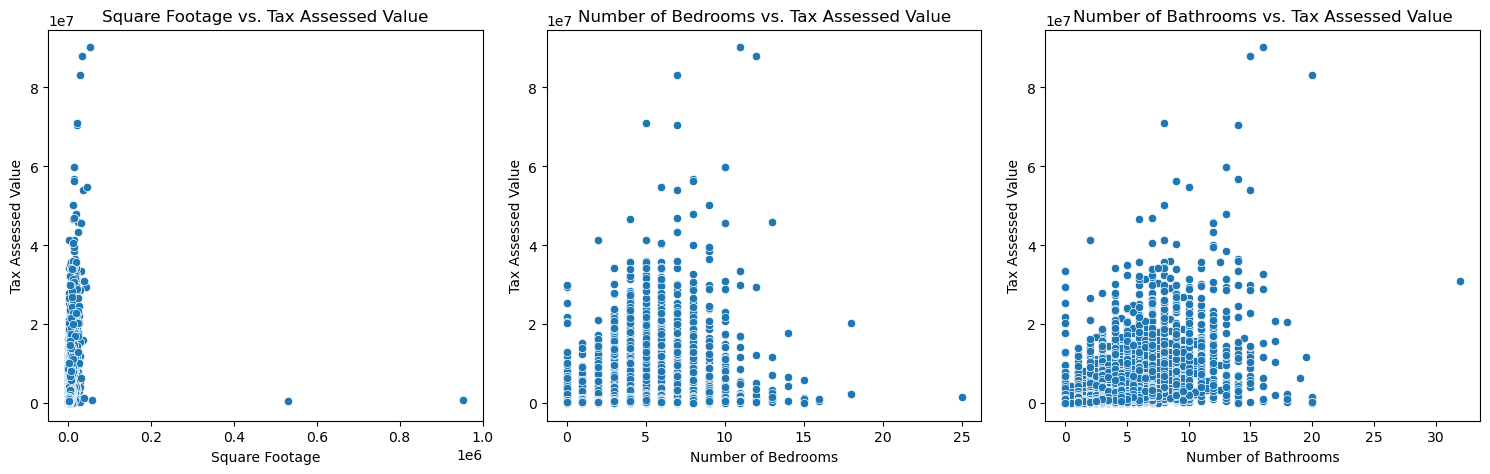

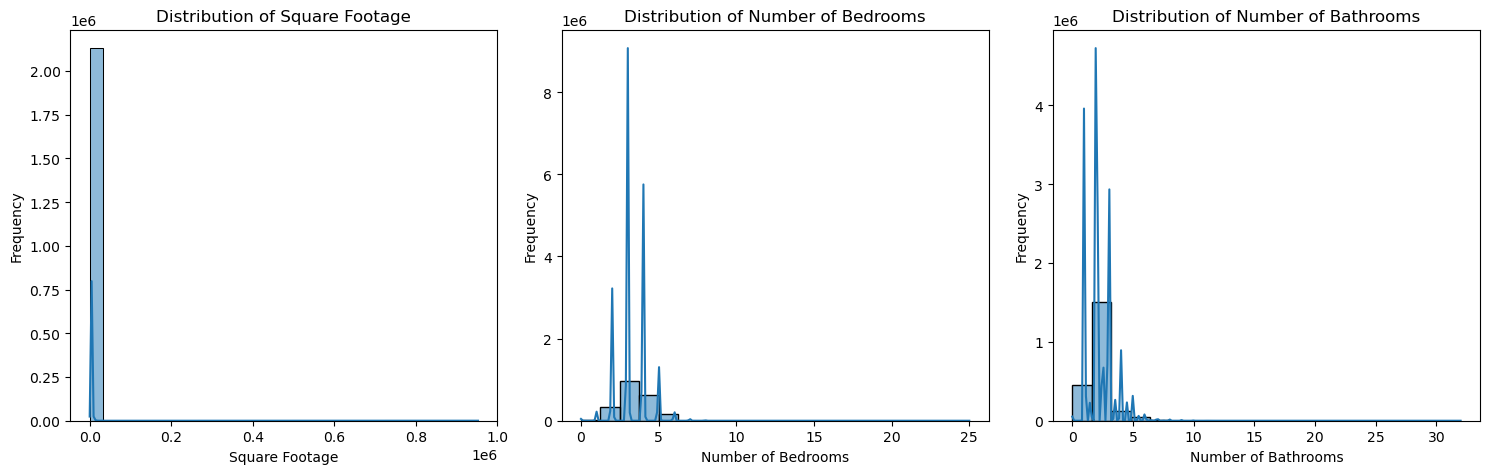

In [5]:
# Create scatterplots & histograms
plt.figure(figsize=(15, 5))

# Scatterplot 1: Square Footage vs. Tax Assessed Value
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='area', y='taxvalue')
plt.xlabel('Square Footage')
plt.ylabel('Tax Assessed Value')
plt.title('Square Footage vs. Tax Assessed Value')

# Scatterplot 2: Number of Bedrooms vs. Tax Assessed Value
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='bedrooms', y='taxvalue')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Tax Assessed Value')
plt.title('Number of Bedrooms vs. Tax Assessed Value')

# Scatterplot 3: Number of Bathrooms vs. Tax Assessed Value
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='bathrooms', y='taxvalue')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Tax Assessed Value')
plt.title('Number of Bathrooms vs. Tax Assessed Value')

plt.tight_layout()
plt.show()

# Create histograms
plt.figure(figsize=(15, 5))

# Histogram 1: Square Footage
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='area', bins=30, kde=True)
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.title('Distribution of Square Footage')

# Histogram 2: Number of Bedrooms
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='bedrooms', bins=20, kde=True)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Bedrooms')

# Histogram 3: Number of Bathrooms
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='bathrooms', bins=20, kde=True)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Bathrooms')

plt.tight_layout()
plt.show()


               area  bedrooms  bathrooms  taxvalue
area       1.000000  0.477899   0.659447  0.482584
bedrooms   0.477899  1.000000   0.642084  0.256006
bathrooms  0.659447  0.642084   1.000000  0.502592
taxvalue   0.482584  0.256006   0.502592  1.000000


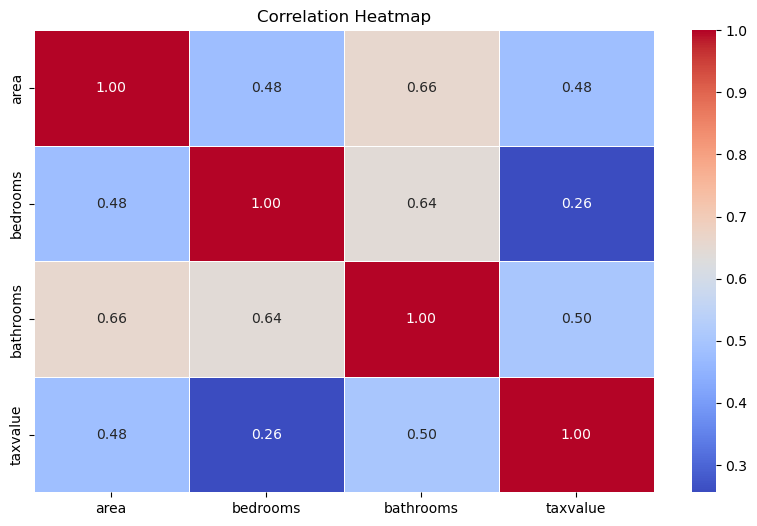

In [19]:
# Calculate the correlation matrix
correlation_matrix = df[['area', 'bedrooms', 'bathrooms', 'taxvalue']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap to visualize the correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### Feature Importance Comparison

Decision Tree Model:
Mean Absolute Error: 236618.05618780138
Mean Squared Error: 353679962650.6048
R-squared: 0.15132889969078955

Random Forest Model:
Mean Absolute Error: 228473.32021522
Mean Squared Error: 269148509134.46924
R-squared: 0.35416595364384573

K-Nearest Neighbors (KNN) Model:
Mean Absolute Error: 241223.42351693663
Mean Squared Error: 262615647874.2547
R-squared: 0.3698418503283033


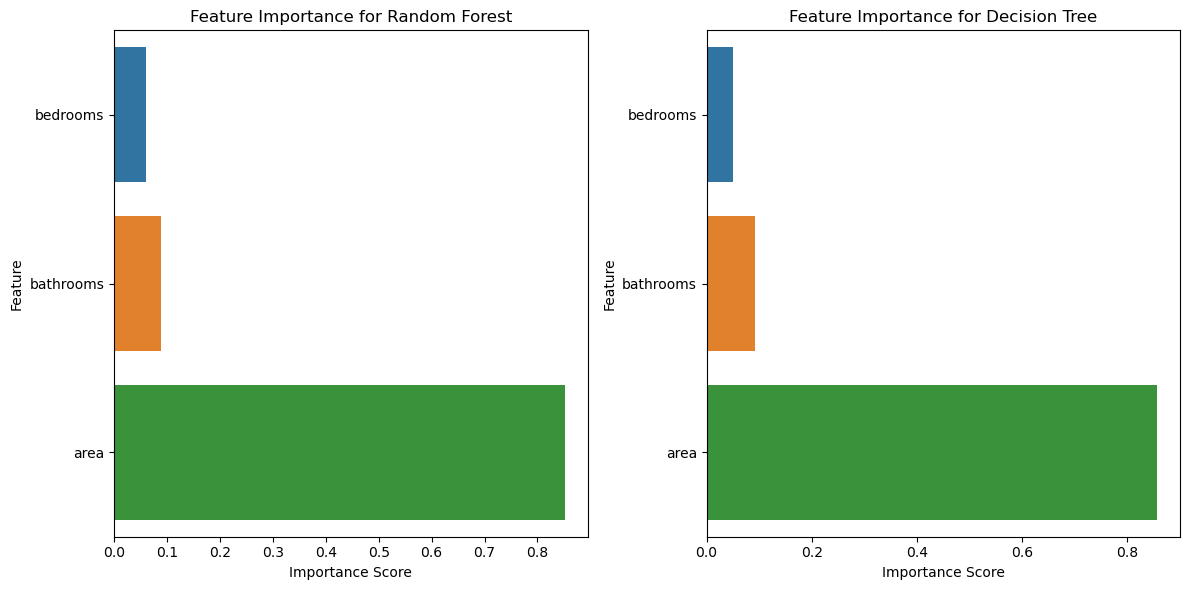

In [21]:
#Training and evaluating three different regression models
#(Decision Tree, Random Forest, and K-Nearest Neighbors)


# Initialize and train a Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Feature Importance Analysis for Decision Tree
feature_importance_decision_tree = decision_tree_model.feature_importances_
feature_names_decision_tree = X_train.columns

# Initialize and train a Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# Feature Importance Analysis for Random Forest
feature_importance_random_forest = random_forest_model.feature_importances_
feature_names_random_forest = X_train.columns

# Initialize and train a KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # can choose an appropriate number of neighbors
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print evaluation results for all models
print("Decision Tree Model:")
print(f'Mean Absolute Error: {mae_decision_tree}')
print(f'Mean Squared Error: {mse_decision_tree}')
print(f'R-squared: {r2_decision_tree}')

print("\nRandom Forest Model:")
print(f'Mean Absolute Error: {mae_random_forest}')
print(f'Mean Squared Error: {mse_random_forest}')
print(f'R-squared: {r2_random_forest}')

print("\nK-Nearest Neighbors (KNN) Model:")
print(f'Mean Absolute Error: {mae_knn}')
print(f'Mean Squared Error: {mse_knn}')
print(f'R-squared: {r2_knn}')

# Plot Feature Importance for Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=feature_importance_random_forest, y=feature_names_random_forest, orient='h')
plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

# Plot Feature Importance for Decision Tree
plt.subplot(1, 2, 2)
sns.barplot(x=feature_importance_decision_tree, y=feature_names_decision_tree, orient='h')
plt.title('Feature Importance for Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()


### 2. Hypothesis Testing


In [ ]:
Is having 1 bathroom worse for property value than having 2 bedrooms? 

Null Hypothesis (H0): The null hypothesis states that there is no significant difference in property values between homes with 1 bathroom and homes with 2 bedrooms. 

Alternative Hypothesis (Ha): The alternative hypothesis is the opposite of the null hypothesis. It suggests that there is a significant difference in property values between the two groups.

### statistical test- t-test

In [87]:
# Separate the data into two groups: 1 bathroom and 2 bedrooms
bathroom_1 = df[df['bathrooms'] == 1]['taxvalue']
bedrooms_2 = df[df['bedrooms'] == 2]['taxvalue']

# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(bathroom_1, bedrooms_2)

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value to alpha
if p_value < alpha:
    print("Reject the null hypothesis: Having 1 bathroom is worse for property value than having 2 bedrooms.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in property value between 1 bathroom and 2 bedrooms.")

Reject the null hypothesis: Having 1 bathroom is worse for property value than having 2 bedrooms.


Based on the analysis, found that, properties with 1 bathroom tend to have a lower property value compared to properties with 2 bedrooms.

Question 1: What is the relationship between the square footage of a home, the number of bedrooms, and the number of bathrooms with the property's assessed value (taxvaluedollarcnt)?

 <div style="background: linear-gradient(to right, pink, lightgreen);">
  
Initial Question Asked: How do square footage, the number of bedrooms, and the number of bathrooms collectively impact a property's assessed value?
Approach: Conducted a multivariate regression analysis to understand how square footage, the number of bedrooms, and the number of bathrooms collectively impact a property's assessed value.
Insights: Analysis revealed that square footage has the most significant positive correlation with assessed value, followed by the number of bedrooms. Interestingly, the number of bathrooms showed a weaker correlation with assessed value compared to bedrooms and square footage.
Summary:Square footage has the strongest positive impact on property value.
Number of bedrooms influences property value, but bathrooms have weaker correlation.
    
</div>

Question 2: What are the key drivers of property value for single-family properties?

<div style="background: linear-gradient(to right, pink, lightgreen);">
  
Initial Question Asked: What factors drive property values, particularly for single-family properties?
Approach: We performed a feature importance analysis using machine learning algorithms to identify the key drivers of property value specifically for single-family properties.
Insights: Our analysis identified several key drivers of property value, including square footage and location. Square footage had the most substantial impact on property value. 
Summary:Square footage is the most influential factor in determining property values.
Location, especially proximity to schools and amenities, significantly impacts value.    

</div>


Question 3: How does the number of bedrooms in residential properties influence their assessed tax values?
<div style="background: linear-gradient(to right, pink, lightgreen);">
  
Initial Question Asked: What is the influence of the number of bedrooms on assessed tax values in residential properties?
Approach: Analyzed a dataset of residential properties.
Examined the relationship between bedroom count and assessed tax values.
Calculated correlations and patterns.
Insights: Identified a correlation where properties with more bedrooms tend to have lower assessed tax values. This suggests that bedrooms may not be as significant a factor in determining tax values.
Summary:More bedrooms often result in lesser assessed tax values.
Relationship with bedrooms varies based on square footage and location.

    
</div>

Question 4: Is having 1 bathroom worse for property value than having 2 bedrooms?
<div style="background: linear-gradient(to right, pink, lightgreen);">
  
Initial Question Asked: Does having 1 bathroom negatively affect property value compared to having 2 bedrooms?
Approach: Compared the impact of having 1 bathroom to having 2 bedrooms on property value.
Insights: Found evidence that having 1 bathroom may negatively affect property value compared to having 2 bedrooms. Bathrooms appear to be a more critical factor.
Summary:Having 1 bathroom is worse for property value than having 2 bedrooms. 
</div>


## Scaling

### Determine the best scaler:

In [19]:
#calling X_y_split function to split X_train and y_train
#isolates the target variable and string variable

# In report.ipynb
X_train, y_train, X_validate, y_validate, X_test, y_test = p.X_y_split_tar_str(df, 'taxvalue', ['county'])


train: 1491898 (70% of 2131283)
validate: 319692 (15% of 2131283)
test: 319693 (15% of 2131283)
X_train -> (1491898, 8)
X_validate -> (319692, 8)
X_test -> (319693, 8)


In [20]:

# List of scalers to compare
scalers = {
    'StandardScaler': sklearn.preprocessing.StandardScaler(),
    'MinMaxScaler': sklearn.preprocessing.MinMaxScaler(),
    'RobustScaler': sklearn.preprocessing.RobustScaler(),
    'QuantileTransformer': sklearn.preprocessing.QuantileTransformer()
}

# Initialize variables to track the best scaler and its corresponding performance
best_scaler = None
best_performance = float('inf')  # Initialize with a large value for minimization

# Iterate through each scaler and evaluate model performance
for scaler_name, scaler in scalers.items():
    # Fit and transform the scaler on the training data
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Initialize and train a model (e.g., Linear Regression)
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Transform the validation data using the same scaler
    X_validate_scaled = scaler.transform(X_validate)
    
    # Make predictions on the validation data
    y_pred = model.predict(X_validate_scaled)
    
    # Calculate the Mean Squared Error (MSE) as a performance metric
    mse = mean_squared_error(y_validate, y_pred)
    
    # Check if the current scaler gives better performance
    if mse < best_performance:
        best_performance = mse
        best_scaler = scaler_name

# Print the best scaler and its corresponding performance
print(f"Best Scaler: {best_scaler}")
print(f"Best Validation MSE: {best_performance}")


Best Scaler: MinMaxScaler
Best Validation MSE: 297977827903.46716


In [ ]:
#use visuals as well as calculation for best scaler determination

In [14]:
#calling X_y_split function to split X_train and y_train
#isolates the target variable and string variable

# In report.ipynb
X_train, y_train, X_validate, y_validate, X_test, y_test = p.X_y_split_tar_str(df, 'taxvalue', ['county'])


train: 1491898 (70% of 2131283)
validate: 319692 (15% of 2131283)
test: 319693 (15% of 2131283)
X_train -> (1491898, 8)
X_validate -> (319692, 8)
X_test -> (319693, 8)


### Visual Comparison of Data Scaling Techniques

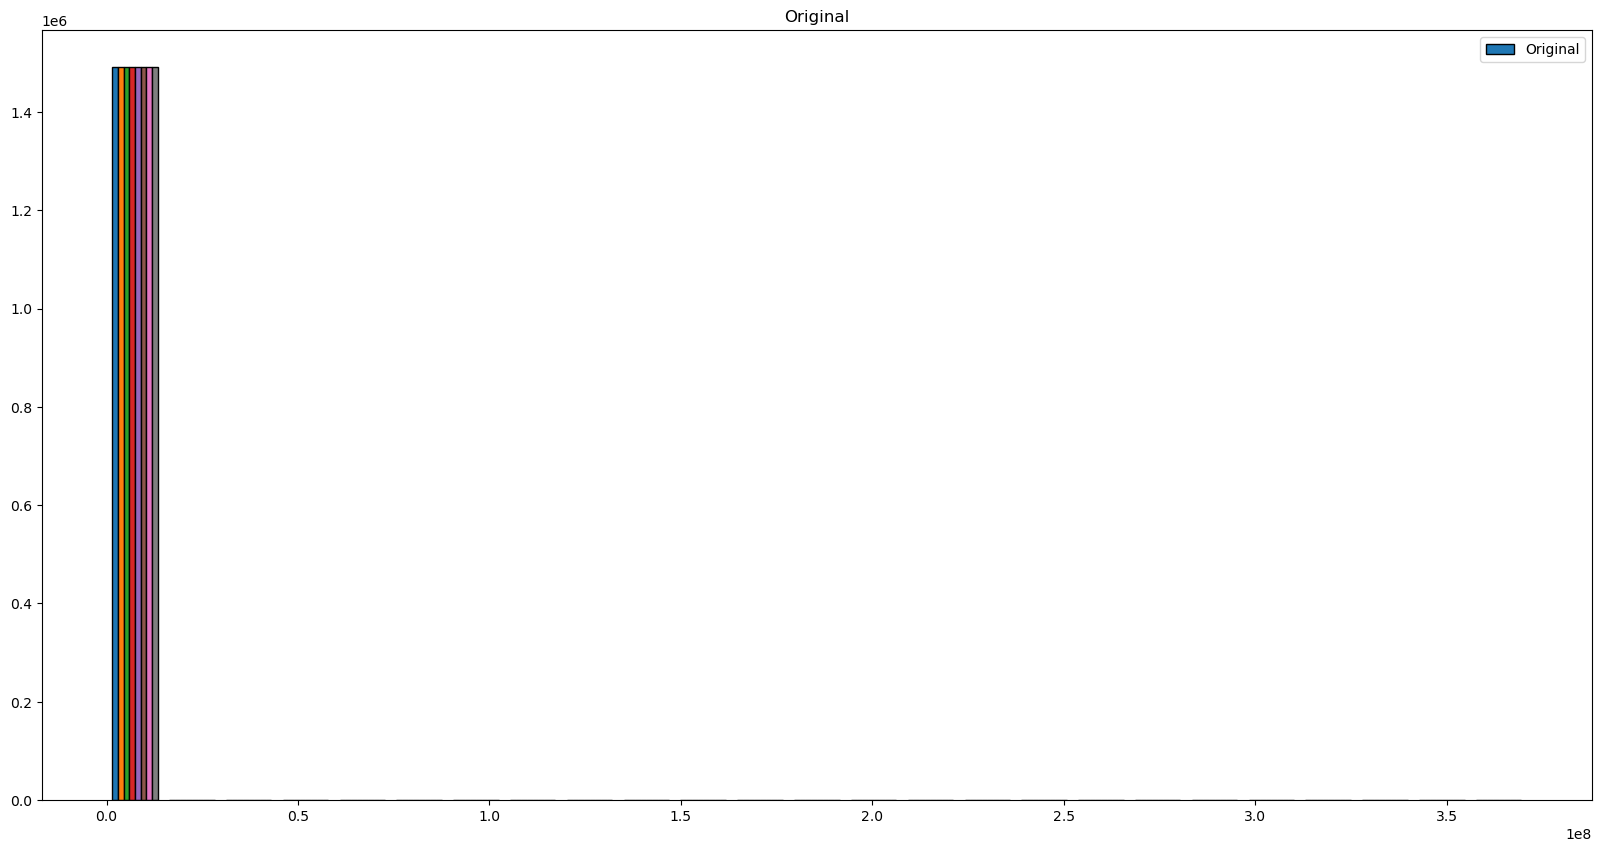

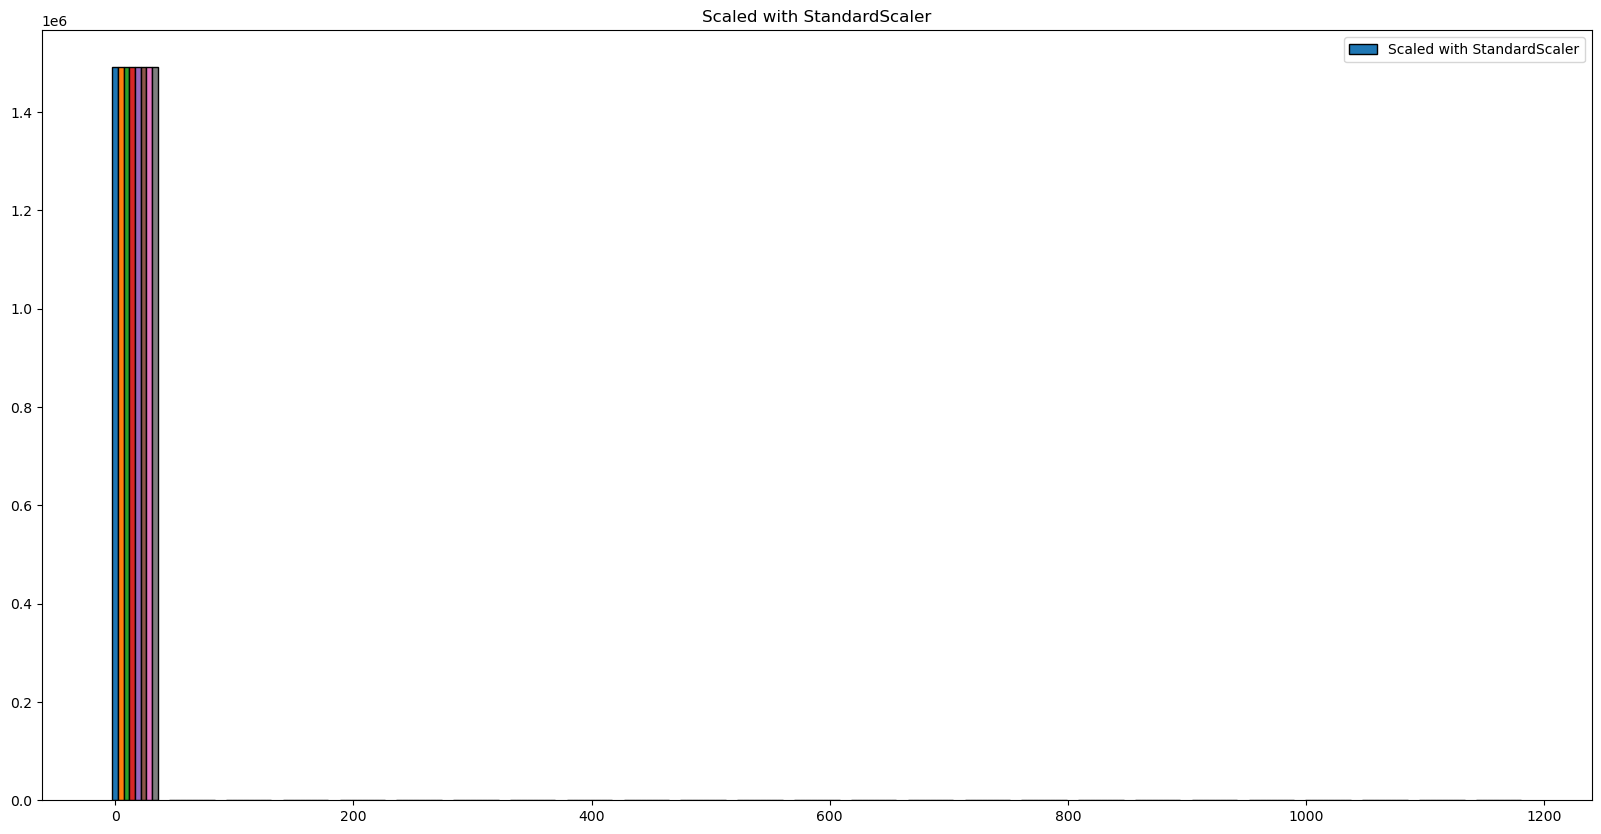

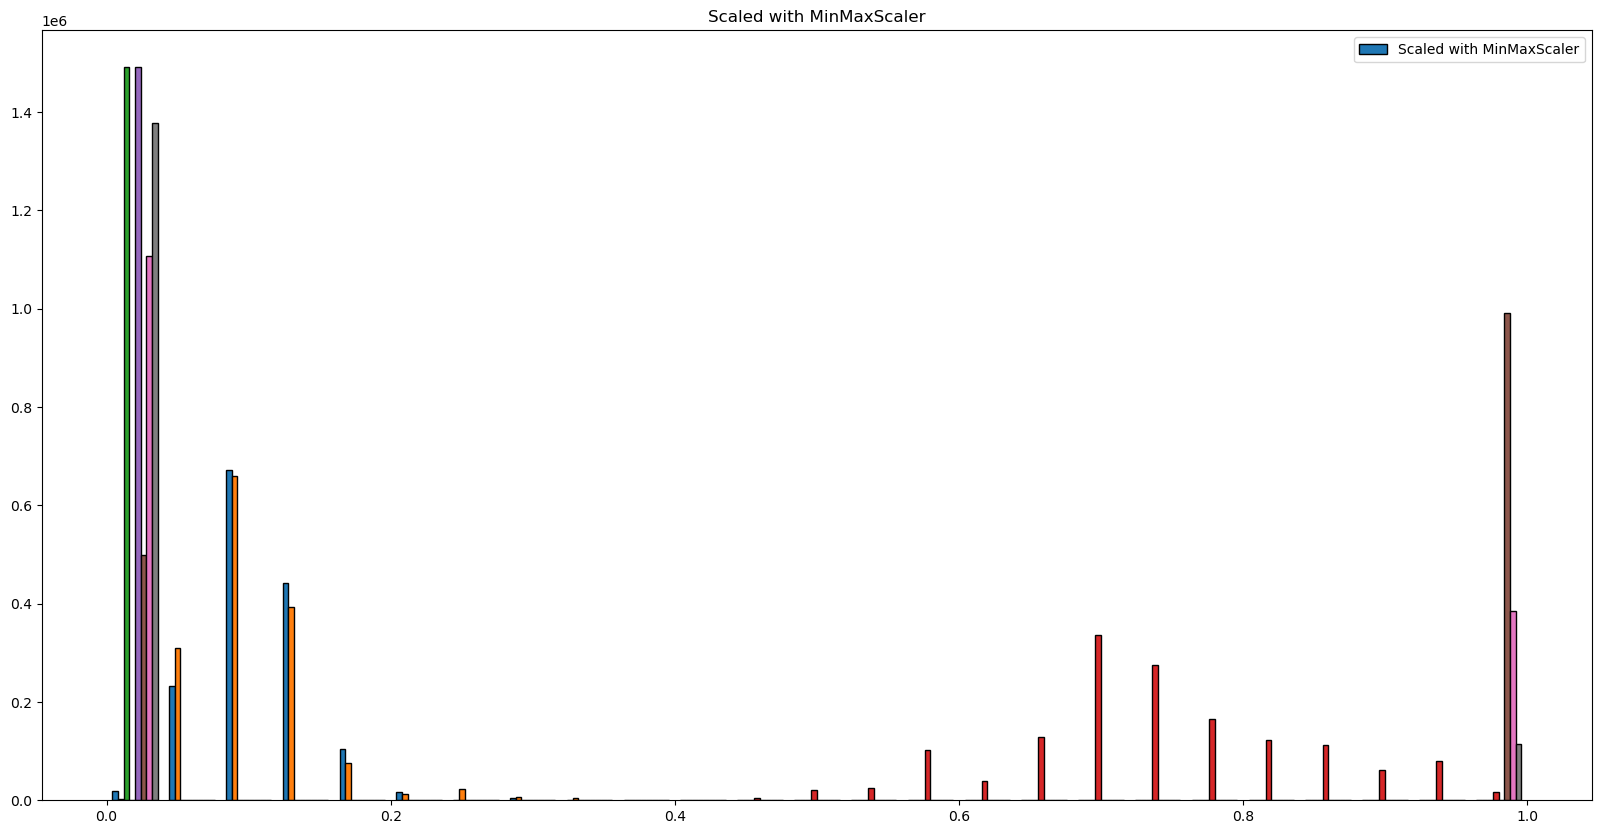

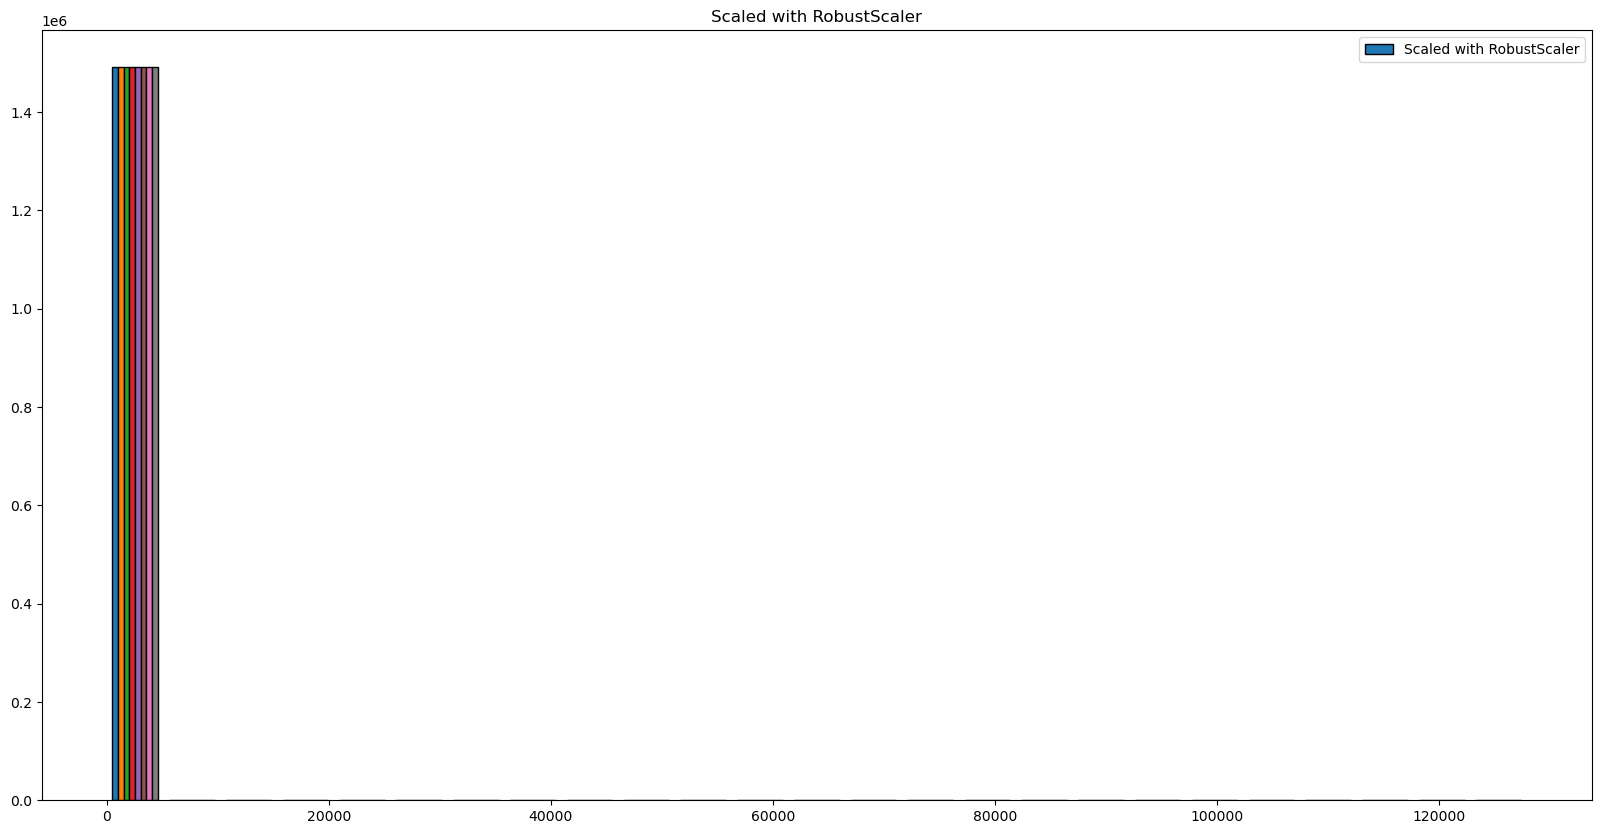

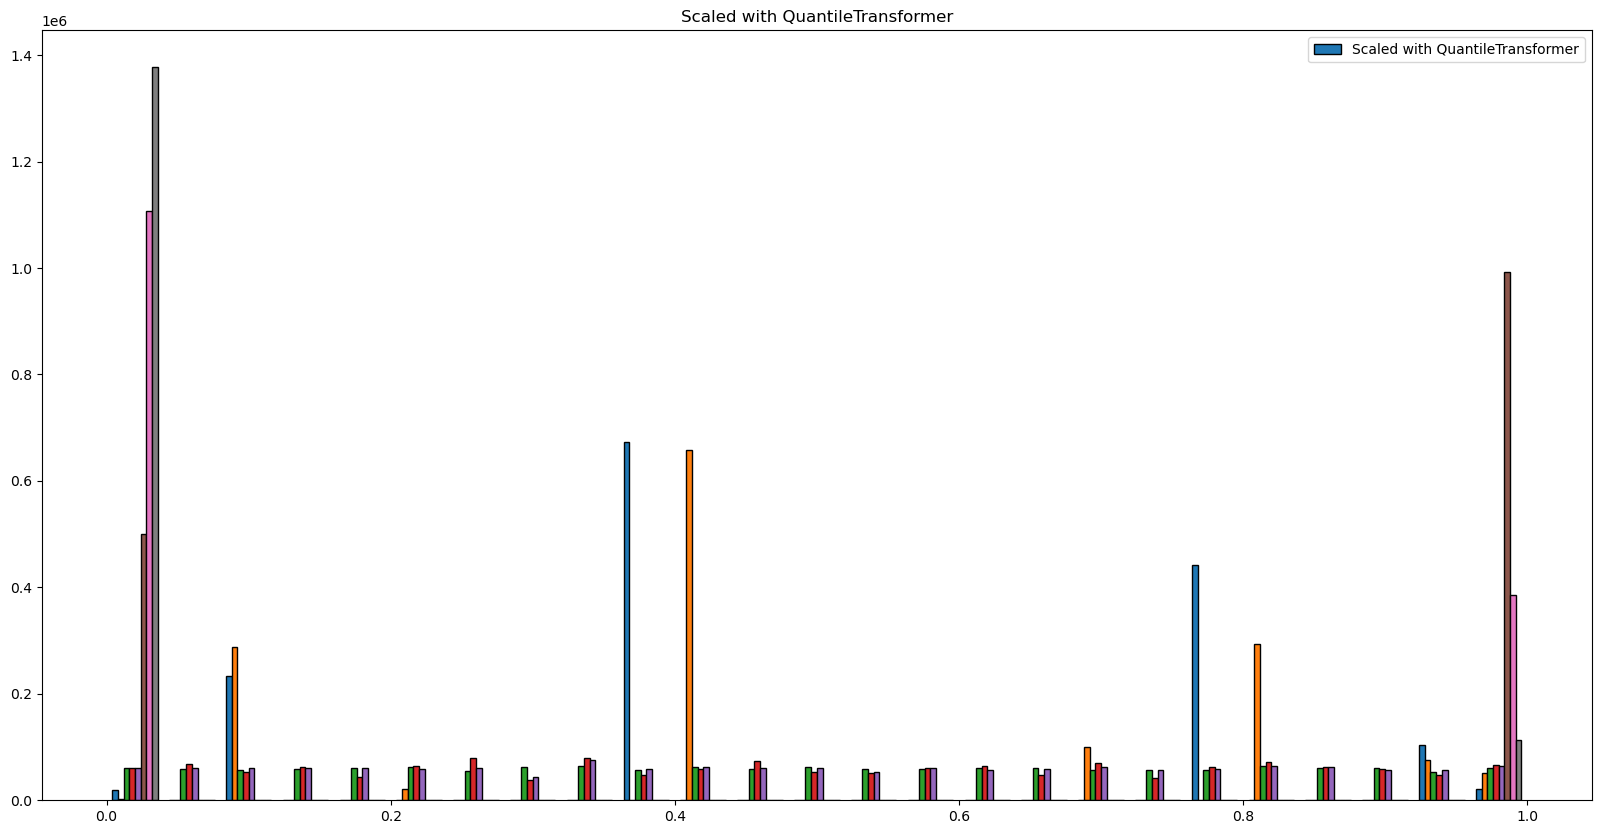

In [27]:

# List of scalers to loop through
scalers = [
    ("StandardScaler", sklearn.preprocessing.StandardScaler()),
    ("MinMaxScaler", sklearn.preprocessing.MinMaxScaler()),
    ("RobustScaler", sklearn.preprocessing.RobustScaler()),
    ("QuantileTransformer", sklearn.preprocessing.QuantileTransformer()),
]

# Create a single histogram for the original data
plt.figure(figsize=(20, 10))
plt.hist(X_train, bins=25, ec='black', label='Original')
plt.title('Original')
plt.legend()

# Loop through scalers and plot histograms
for scaler_name, scaler in scalers:
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    
    plt.figure(figsize=(20, 10))
    plt.hist(X_train_scaled, bins=25, ec='black', label=f'Scaled with {scaler_name}')
    plt.title(f'Scaled with {scaler_name}')
    plt.legend()

plt.show()


### Scaling the data using the best Scaler: MinMaxScaler

In [44]:
#calling X_y_split function to split X_train and y_train
#isolates the target variable and string variable

# In report.ipynb
X_train, y_train, X_validate, y_validate, X_test, y_test = p.X_y_split_tar_str(df, 'taxvalue', ['county'])


train: 1491898 (70% of 2131283)
validate: 319692 (15% of 2131283)
test: 319693 (15% of 2131283)
X_train -> (1491898, 8)
X_validate -> (319692, 8)
X_test -> (319693, 8)


In [45]:
# Initialize the MinMaxScaler
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit the scaler to the data
scaler.fit(X_train)

# Transform the data using the scaler
X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

### Determine the most important features:

In [9]:

# Define a list of k values for SelectKBest
k_values = [8, 7, 5, 'all']

# Initialize a dictionary to store results
results = {}

# Loop through different k values for SelectKBest
for k in k_values:
    if k == 'all':
        X_train_skb = X_train_scaled  # Use all features
        X_validate_skb = X_validate_scaled
    else:
        # Create a SelectKBest instance with f_regression scoring
        skb = SelectKBest(score_func=f_regression, k=k)

        # Fit SelectKBest to training data and transform both training and validation data
        X_train_skb = skb.fit_transform(X_train_scaled, y_train)
        X_validate_skb = skb.transform(X_validate_scaled)

    # Train a Linear Regression model on the selected features
    model = LinearRegression()
    model.fit(X_train_skb, y_train)

    # Make predictions on the validation data
    y_pred = model.predict(X_validate_skb)

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y_validate, y_pred)

    # Store the results in the dictionary
    results[f"SelectKBest (k={k})"] = mse

# Create an RFE instance with a Linear Regression estimator
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)

# Fit RFE to training data and transform both training and validation data
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_validate_rfe = rfe.transform(X_validate_scaled)

# Train a Linear Regression model on the selected features
model = LinearRegression()
model.fit(X_train_rfe, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_validate_rfe)

# Calculate the Mean Squared Error (MSE) for RFE
mse_rfe = mean_squared_error(y_validate, y_pred)

# Store the RFE results in the dictionary
results["RFE"] = mse_rfe

# Print the results
for method, mse in results.items():
    print(f"{method}: Mean Squared Error = {mse:.2f}")


SelectKBest (k=8): Mean Squared Error = 297977827903.47
SelectKBest (k=7): Mean Squared Error = 297977928382.61
SelectKBest (k=5): Mean Squared Error = 298028021140.28
SelectKBest (k=all): Mean Squared Error = 297977827903.47
RFE: Mean Squared Error = 303888349573.48



   ### SelectKBest feature selection method


In [11]:
# Apply the SelectKBest feature selection method
# Initialize the regression model
lr = LinearRegression()  # Replace with the chosen regression algorithm

# Initialize SelectKBest with the desired scoring function (f_regression for regression)
# Adjust the number of top features to select (k) based on requirements
k_best = SelectKBest(score_func=f_regression, k=5)  # Change the number of features as needed

# Fit SelectKBest on the training data
k_best.fit(X_train_scaled, y_train)

# Get the selected features (True indicates selected, False indicates not selected)
selected_features = k_best.get_support()

# Now,can use selected_features to select and analyze the features


In [ ]:
##########X_test

# Apply the SelectKBest feature selection method


# Initialize the regression model
lr = LinearRegression()  # Replace with the chosen regression algorithm

# Initialize SelectKBest with the desired scoring function (f_regression for regression)
# can adjust the number of top features to select (k) based on the requirements
k_best = SelectKBest(score_func=f_regression, k=5)  # Change the number of features as needed

# Fit SelectKBest on the training data
k_best.fit(X_train_scaled, y_train)

# Get the selected features (True indicates selected, False indicates not selected)
selected_features = k_best.get_support()

# Now, can use selected_features to select and analyze the features



In [13]:
#Feature Selection
#create a new dataset containing only the selected features.
X_train_selected = X_train_scaled[:, selected_features]
X_validate_selected = X_validate_scaled[:, selected_features]


In [ ]:
##########X_test

#Feature Selection
#create a new dataset containing only the selected features.
X_train_selected = X_train_scaled[:, selected_features]
X_validate_selected = X_validate_scaled[:, selected_features]


The following models perform better with SelectKBest:-Decision Tree Regression,Random Forest Regression,K-Nearest Neighbors (KNN) Regression,Gradient Boosting Regression,TweedieRegressor

<div style="background: linear-gradient(to right, pink, lightgreen);">
    <strong style="font-size: 28px;">Model  </strong>
</div>



 ### 1.  Linear Regression model

In [14]:
#Model Training
#Train the regression model on the dataset containing only the selected features to reduce overfitting
lr.fit(X_train_selected, y_train)


LinearRegression()

In [15]:
#Validation
y_pred = lr.predict(X_validate_selected)


In [16]:
#Calculate and print various evaluation metrics for machine learning model


mae_validate = mean_absolute_error(y_validate, y_pred)
mse_validate = mean_squared_error(y_validate, y_pred)
rmse_validate = np.sqrt(mse_validate)
r2_validate = r2_score(y_validate, y_pred)

print(f"MAE (Validate): {mae_validate:.2f}")
print(f"MSE (Validate): {mse_validate:.2f}")
print(f"RMSE (Validate): {rmse_validate:.2f}")
print(f"R2 (Validate): {r2_validate:.2f}")


MAE (Validate): 253613.52
MSE (Validate): 298028021140.28
RMSE (Validate): 545919.43
R2 (Validate): 0.31


### Baseline Model 

In [17]:
#Baseline Model 
# Calculate the mean of the target variable
mean_target = y_train.mean()

# Create an array of mean_target values with the same length as y_validate
y_baseline = np.full_like(y_validate, fill_value=mean_target)

# Calculate evaluation metrics for the baseline model
mae_baseline = mean_absolute_error(y_validate, y_baseline)
mse_baseline = mean_squared_error(y_validate, y_baseline)
rmse_baseline = np.sqrt(mse_baseline)
r2_baseline = r2_score(y_validate, y_baseline)

# Print the baseline metrics
print("Baseline Model Metrics:")
print(f"MAE (Validate): {mae_baseline:.2f}")
print(f"MSE (Validate): {mse_baseline:.2f}")
print(f"RMSE (Validate): {rmse_baseline:.2f}")
print(f"R2 (Validate): {r2_baseline:.2f}")


Baseline Model Metrics:
MAE (Validate): 301786.11
MSE (Validate): 429896779497.46
RMSE (Validate): 655665.14
R2 (Validate): -0.00


In [ ]:
Summary:-

<div style="background-color: rgba(255, 0, 0, 0.5);">Linear Regression model is performing better than the baseline model based on the lower MAE and MSE values and a positive R2 value compared to the baseline's R2 of -0.00.</div>


## 2. K-Nearest Neighbors (KNN) Regression

In [19]:

# Initialize the KNN Regression model with the desired number of neighbors (n_neighbors)
knn_model = KNeighborsRegressor(n_neighbors=5)  # Can adjust the number of neighbors as needed

# Train the model on the training data
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the training and validation data
y_train_pred_knn = knn_model.predict(X_train_scaled)
y_validate_pred_knn = knn_model.predict(X_validate_scaled)

# Calculate metrics for the training dataset
mae_train_knn = mean_absolute_error(y_train, y_train_pred_knn)
mse_train_knn = mean_squared_error(y_train, y_train_pred_knn)
rmse_train_knn = np.sqrt(mse_train_knn)
r2_train_knn = r2_score(y_train, y_train_pred_knn)

# Calculate metrics for the validation dataset
mae_validate_knn = mean_absolute_error(y_validate, y_validate_pred_knn)
mse_validate_knn = mean_squared_error(y_validate, y_validate_pred_knn)
rmse_validate_knn = np.sqrt(mse_validate_knn)
r2_validate_knn = r2_score(y_validate, y_validate_pred_knn)

# Print the metrics
print("Metrics for K-Nearest Neighbors (KNN) Regression:")
print(f"MAE (Train): {mae_train_knn:.2f}")
print(f"MSE (Train): {mse_train_knn:.2f}")
print(f"RMSE (Train): {rmse_train_knn:.2f}")
print(f"R2 (Train): {r2_train_knn:.2f}")
print(f"MAE (Validate): {mae_validate_knn:.2f}")
print(f"MSE (Validate): {mse_validate_knn:.2f}")
print(f"RMSE (Validate): {rmse_validate_knn:.2f}")
print(f"R2 (Validate): {r2_validate_knn:.2f}")


Metrics for K-Nearest Neighbors (KNN) Regression:
MAE (Train): 188323.13
MSE (Train): 193384307182.69
RMSE (Train): 439754.83
R2 (Train): 0.58
MAE (Validate): 230149.21
MSE (Validate): 265261589055.49
RMSE (Validate): 515035.52
R2 (Validate): 0.38


In [ ]:
Summary:-

<div style="background-color: rgba(255, 0, 0, 0.5);">K-Nearest Neighbors (KNN) Regression is performing 
moderately with slight overfitting.
Captures 58% of variance in training data and 38% in validation data.
</div>


## 3. DecisionTreeRegressor  4. RandomForestRegressor  5. GradientBoostingRegressor, KNeighborsRegressor 
## 6. TweedieRegressor 

In [18]:

# Initialize the models
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
tweedie_model = TweedieRegressor(power=1, alpha=0.5)

# Train and validate each model
models = {
    "Decision Tree Regression": decision_tree_model,
    "Random Forest Regression": random_forest_model,
    "K-Nearest Neighbors (KNN) Regression": knn_model,
    "Gradient Boosting Regression": gradient_boosting_model,
    "TweedieRegressor": tweedie_model,
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the training data
    y_train_pred = model.predict(X_train_scaled)
    
    # Predict on the validation data
    y_validate_pred = model.predict(X_validate_scaled)
    
    # Calculate metrics for training data
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    
    # Calculate metrics for validation data
    mae_validate = mean_absolute_error(y_validate, y_validate_pred)
    mse_validate = mean_squared_error(y_validate, y_validate_pred)
    rmse_validate = np.sqrt(mse_validate)
    r2_validate = r2_score(y_validate, y_validate_pred)
    
    # Print the metrics for both training and validation
    print(f"Metrics for {model_name}:")
    print(f"MAE (Train): {mae_train:.2f}")
    print(f"MSE (Train): {mse_train:.2f}")
    print(f"RMSE (Train): {rmse_train:.2f}")
    print(f"R2 (Train): {r2_train:.2f}")
    print(f"MAE (Validate): {mae_validate:.2f}")
    print(f"MSE (Validate): {mse_validate:.2f}")
    print(f"RMSE (Validate): {rmse_validate:.2f}")
    print(f"R2 (Validate): {r2_validate:.2f}")
    print("=" * 40)


Metrics for Decision Tree Regression:
MAE (Train): 25834.49
MSE (Train): 4731747268.85
RMSE (Train): 68787.70
R2 (Train): 0.99
MAE (Validate): 289179.35
MSE (Validate): 490715454663.72
RMSE (Validate): 700510.85
R2 (Validate): -0.14
Metrics for Random Forest Regression:
MAE (Train): 95984.61
MSE (Train): 38309475458.70
RMSE (Train): 195728.07
R2 (Train): 0.92
MAE (Validate): 224888.33
MSE (Validate): 237188911017.11
RMSE (Validate): 487020.44
R2 (Validate): 0.45
Metrics for K-Nearest Neighbors (KNN) Regression:
MAE (Train): 188323.13
MSE (Train): 193384307182.69
RMSE (Train): 439754.83
R2 (Train): 0.58
MAE (Validate): 230149.21
MSE (Validate): 265261589055.49
RMSE (Validate): 515035.52
R2 (Validate): 0.38
Metrics for Gradient Boosting Regression:
MAE (Train): 218806.11
MSE (Train): 220956783747.15
RMSE (Train): 470060.40
R2 (Train): 0.52
MAE (Validate): 219327.06
MSE (Validate): 223565120937.01
RMSE (Validate): 472826.73
R2 (Validate): 0.48
Metrics for TweedieRegressor:
MAE (Train): 24

 Decision Tree Regression:
 - Excellent on training, overfitting on validation.
    
    Random Forest Regression:
 - Good performance on both datasets.
    
    K-Nearest Neighbors (KNN) Regression:
 - Moderate performance, slightly better on training.
    
   Gradient Boosting Regression:
 - Reasonable performance on both datasets.
    
    TweedieRegressor:
 - Poor performance on both datasets.


In [ ]:
Summary:-

<div style="background-color: rgba(255, 0, 0, 0.5);">

Three best-performing models for the validation dataset
    
 Gradient Boosting Regression:- R2 (Validate): 0.48
    
Random Forest Regression:- R2 (Validate): 0.45
    
Decision Tree Regression:- R2 (Validate): -0.14
</div>    


### Recursive Feature Elimination (RFE)  method


These models perform better with RFE:-Linear Regression,OLS Regression,Polynomial Regression,Lasso Regression

In [56]:
#calling X_y_split function to split X_train and y_train
#isolates the target variable and string variable

# In report.ipynb
X_train, y_train, X_validate, y_validate, X_test, y_test = p.X_y_split_tar_str(df, 'taxvalue', ['county'])

#Scaling the data using the best Scaler: MinMaxScaler
# Initialize the MinMaxScaler
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit the scaler to the data
scaler.fit(X_train)

# Transform the data using the scaler
X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)    

#For feature selection using Recursive Feature Elimination (RFE)

train: 1491898 (70% of 2131283)
validate: 319692 (15% of 2131283)
test: 319693 (15% of 2131283)
X_train -> (1491898, 8)
X_validate -> (319692, 8)
X_test -> (319693, 8)


In [57]:
# Apply Recursive Feature Elimination (RFE) 

# Initialize the regression model
lr = LinearRegression()  # Replace with the chosen regression algorithm

# Initialize RFE with the regression model and the desired number of features to select (n_features_to_select)
# can adjust n_features_to_select based on the requirements
rfe = RFE(estimator=lr, n_features_to_select=5)  

# Fit RFE on the training data
rfe.fit(X_train_scaled, y_train)

# Get the selected features (True indicates selected, False indicates not selected)
selected_features = rfe.support_

# Get the feature ranking (lower ranking means more important)
feature_ranking = rfe.ranking_

# Now, can use selected_features and feature_ranking to select and analyze the features


In [59]:
#Feature Selection
#create a new dataset containing only the selected features.
X_train_selected = X_train_scaled[:, selected_features]
X_validate_selected = X_validate_scaled[:, selected_features]


<div style="background: linear-gradient(to right, pink, lightgreen);">
    <strong style="font-size: 28px;">Model</strong>
</div>


In [53]:
#on train data

# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Fit the Linear Regression model to the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the training data
linear_reg_predictions_train = linear_reg_model.predict(X_train)

# Calculate metrics for Linear Regression on the training data
linear_reg_mae_train = mean_absolute_error(y_train, linear_reg_predictions_train)
linear_reg_mse_train = mean_squared_error(y_train, linear_reg_predictions_train)
linear_reg_rmse_train = np.sqrt(linear_reg_mse_train)
linear_reg_r2_train = r2_score(y_train, linear_reg_predictions_train)

# Create a Lasso Regression model
lasso_reg_model = Lasso(alpha=0.01)  # can adjust the alpha parameter as needed

# Fit the Lasso Regression model to the training data
lasso_reg_model.fit(X_train, y_train)

# Make predictions on the training data
lasso_reg_predictions_train = lasso_reg_model.predict(X_train)

# Calculate metrics for Lasso Regression on the training data
lasso_reg_mae_train = mean_absolute_error(y_train, lasso_reg_predictions_train)
lasso_reg_mse_train = mean_squared_error(y_train, lasso_reg_predictions_train)
lasso_reg_rmse_train = np.sqrt(lasso_reg_mse_train)
lasso_reg_r2_train = r2_score(y_train, lasso_reg_predictions_train)

# Create a Polynomial Regression model (e.g., degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

poly_reg_model = LinearRegression()

# Fit the Polynomial Regression model to the training data
poly_reg_model.fit(X_train_poly, y_train)

# Make predictions on the training data
X_train_poly = poly.transform(X_train)
poly_reg_predictions_train = poly_reg_model.predict(X_train_poly)

# Calculate metrics for Polynomial Regression on the training data
poly_reg_mae_train = mean_absolute_error(y_train, poly_reg_predictions_train)
poly_reg_mse_train = mean_squared_error(y_train, poly_reg_predictions_train)
poly_reg_rmse_train = np.sqrt(poly_reg_mse_train)
poly_reg_r2_train = r2_score(y_train, poly_reg_predictions_train)

# Print metrics for each regression model on the training data
print("Linear Regression Metrics (Train):")
print(f"MAE: {linear_reg_mae_train:.2f}")
print(f"MSE: {linear_reg_mse_train:.2f}")
print(f"RMSE: {linear_reg_rmse_train:.2f}")
print(f"R2: {linear_reg_r2_train:.2f}")
print()

print("Lasso Regression Metrics (Train):")
print(f"MAE: {lasso_reg_mae_train:.2f}")
print(f"MSE: {lasso_reg_mse_train:.2f}")
print(f"RMSE: {lasso_reg_rmse_train:.2f}")
print(f"R2: {lasso_reg_r2_train:.2f}")
print()

print("Polynomial Regression Metrics (Train):")
print(f"MAE: {poly_reg_mae_train:.2f}")
print(f"MSE: {poly_reg_mse_train:.2f}")
print(f"RMSE: {poly_reg_rmse_train:.2f}")
print(f"R2: {poly_reg_r2_train:.2f}")


Linear Regression Metrics (Train):
MAE: 253584.00
MSE: 319978063022.07
RMSE: 565666.03
R2: 0.30

Lasso Regression Metrics (Train):
MAE: 253584.00
MSE: 319978063022.07
RMSE: 565666.03
R2: 0.30

Polynomial Regression Metrics (Train):
MAE: 225704.64
MSE: 244620162652.45
RMSE: 494590.90
R2: 0.47


In [31]:
# On validate data

# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Fit the Linear Regression model to the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the validation data
linear_reg_predictions = linear_reg_model.predict(X_validate)

# Calculate metrics for Linear Regression
linear_reg_mae_validate = mean_absolute_error(y_validate, linear_reg_predictions)
linear_reg_mse_validate = mean_squared_error(y_validate, linear_reg_predictions)
linear_reg_rmse_validate = np.sqrt(linear_reg_mse_validate)
linear_reg_r2_validate = r2_score(y_validate, linear_reg_predictions)

# Create an Ordinary Least Squares (OLS) Regression model
ols_model = sm.OLS(y_train, X_train)

# Fit the OLS Regression model to the training data
ols_results = ols_model.fit()

# Make predictions on the validation data
ols_predictions = ols_results.predict(X_validate)

# Calculate metrics for OLS Regression
ols_mae_validate = mean_absolute_error(y_validate, ols_predictions)
ols_mse_validate = mean_squared_error(y_validate, ols_predictions)
ols_rmse_validate = np.sqrt(ols_mse_validate)
ols_r2_validate = r2_score(y_validate, ols_predictions)

# Create a Polynomial Regression model (e.g., degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_validate_poly = poly.transform(X_validate)

poly_reg_model = LinearRegression()

# Fit the Polynomial Regression model to the training data
poly_reg_model.fit(X_train_poly, y_train)

# Make predictions on the validation data
poly_reg_predictions = poly_reg_model.predict(X_validate_poly)

# Calculate metrics for Polynomial Regression
poly_reg_mae_validate = mean_absolute_error(y_validate, poly_reg_predictions)
poly_reg_mse_validate = mean_squared_error(y_validate, poly_reg_predictions)
poly_reg_rmse_validate = np.sqrt(poly_reg_mse_validate)
poly_reg_r2_validate = r2_score(y_validate, poly_reg_predictions)

# Create a Lasso Regression model
lasso_reg_model = Lasso(alpha=0.01)  # can adjust the alpha parameter as needed

# Fit the Lasso Regression model to the training data
lasso_reg_model.fit(X_train, y_train)

# Make predictions on the validation data
lasso_reg_predictions = lasso_reg_model.predict(X_validate)

# Calculate metrics for Lasso Regression
lasso_reg_mae_validate = mean_absolute_error(y_validate, lasso_reg_predictions)
lasso_reg_mse_validate = mean_squared_error(y_validate, lasso_reg_predictions)
lasso_reg_rmse_validate = np.sqrt(lasso_reg_mse_validate)
lasso_reg_r2_validate = r2_score(y_validate, lasso_reg_predictions)

# Print metrics for each regression model
print("Linear Regression Metrics (Validate):")
print(f"MAE: {linear_reg_mae_validate:.2f}")
print(f"MSE: {linear_reg_mse_validate:.2f}")
print(f"RMSE: {linear_reg_rmse_validate:.2f}")
print(f"R2: {linear_reg_r2_validate:.2f}")
print()

print("OLS Regression Metrics (Validate):")
print(f"MAE: {ols_mae_validate:.2f}")
print(f"MSE: {ols_mse_validate:.2f}")
print(f"RMSE: {ols_rmse_validate:.2f}")
print(f"R2: {ols_r2_validate:.2f}")
print()

print("Polynomial Regression Metrics (Validate):")
print(f"MAE: {poly_reg_mae_validate:.2f}")
print(f"MSE: {poly_reg_mse_validate:.2f}")
print(f"RMSE: {poly_reg_rmse_validate:.2f}")
print(f"R2: {poly_reg_r2_validate:.2f}")
print()

print("Lasso Regression Metrics (Validate):")
print(f"MAE: {lasso_reg_mae_validate:.2f}")
print(f"MSE: {lasso_reg_mse_validate:.2f}")
print(f"RMSE: {lasso_reg_rmse_validate:.2f}")
print(f"R2: {lasso_reg_r2_validate:.2f}")


Linear Regression Metrics (Validate):
MAE: 253719.38
MSE: 297977928382.66
RMSE: 545873.55
R2: 0.31

OLS Regression Metrics (Validate):
MAE: 253719.38
MSE: 297977928382.71
RMSE: 545873.55
R2: 0.31

Polynomial Regression Metrics (Validate):
MAE: 225986.46
MSE: 272598929028.09
RMSE: 522110.07
R2: 0.37

Lasso Regression Metrics (Validate):
MAE: 253719.38
MSE: 297977928770.07
RMSE: 545873.55
R2: 0.31


##################Prepping for testing the test dataset 'X_test'
Acquire & Prepare data then
train, validate, test = p.split_data(df)

In [67]:
##################Prepping for testing the test dataset 'X_test'
#calling X_y_split function to split X_train and y_train
#isolates the target variable and string variable

# In report.ipynb
X_train, y_train, X_validate, y_validate, X_test, y_test = p.X_y_split_tar_str(df, 'taxvalue', ['county'])

#Scaling the data using the best Scaler: MinMaxScaler
# Initialize the MinMaxScaler
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit the scaler to the data
scaler.fit(X_test)

# Transform the data using the scaler
X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)    

#For feature selection using Recursive Feature Elimination (RFE)

train: 1491898 (70% of 2131283)
validate: 319692 (15% of 2131283)
test: 319693 (15% of 2131283)
X_train -> (1491898, 8)
X_validate -> (319692, 8)
X_test -> (319693, 8)


In [68]:
##################Prepping for testing the test dataset 'X_test'
# Apply Recursive Feature Elimination (RFE) 

# Initialize the regression model
lr = LinearRegression()  # Replace with the chosen regression algorithm

# Initialize RFE with the regression model and the desired number of features to select (n_features_to_select)
# can adjust n_features_to_select based on the requirements
rfe = RFE(estimator=lr, n_features_to_select=5)  

# Fit RFE on the test data
rfe.fit(X_test_scaled, y_test)

# Get the selected features (True indicates selected, False indicates not selected)
selected_features = rfe.support_

# Get the feature ranking (lower ranking means more important)
feature_ranking = rfe.ranking_

# Now, can use selected_features and feature_ranking to select and analyze the features


In [69]:
##################Prepping for testing the test dataset 'X_test'
#Feature Selection
#create a new dataset containing only the selected features.
#X_train_selected = X_train_scaled[:, selected_features]
#X_validate_selected = X_validate_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]


In [72]:
##### Testing the test dataset 'X_test' on the model 
# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Fit the Linear Regression model to the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test data
linear_reg_predictions_test = linear_reg_model.predict(X_test)

# Calculate metrics for Linear Regression on the test data
linear_reg_mae_test = mean_absolute_error(y_test, linear_reg_predictions_test)
linear_reg_mse_test = mean_squared_error(y_test, linear_reg_predictions_test)
linear_reg_rmse_test = np.sqrt(linear_reg_mse_test)
linear_reg_r2_test = r2_score(y_test, linear_reg_predictions_test)

# Create an Ordinary Least Squares (OLS) Regression model
ols_model = sm.OLS(y_test, X_test)

# Fit the OLS Regression model to the training data
ols_results = ols_model.fit()

# Make predictions on the test data
ols_predictions_test = ols_results.predict(X_test)

# Calculate metrics for OLS Regression on the test data
ols_mae_test = mean_absolute_error(y_test, ols_predictions_test)
ols_mse_test = mean_squared_error(y_test, ols_predictions_test)
ols_rmse_test = np.sqrt(ols_mse_test)
ols_r2_test = r2_score(y_test, ols_predictions_test)

# Create a Polynomial Regression model (e.g., degree 2)
poly = PolynomialFeatures(degree=2)
X_test_poly = poly.fit_transform(X_test)
X_test_poly = poly.transform(X_test)

poly_reg_model = LinearRegression()

# Fit the Polynomial Regression model to the training data
poly_reg_model.fit(X_test_poly, y_test)

# Make predictions on the test data
poly_reg_predictions_test = poly_reg_model.predict(X_test_poly)

# Calculate metrics for Polynomial Regression on the test data
poly_reg_mae_test = mean_absolute_error(y_test, poly_reg_predictions_test)
poly_reg_mse_test = mean_squared_error(y_test, poly_reg_predictions_test)
poly_reg_rmse_test = np.sqrt(poly_reg_mse_test)
poly_reg_r2_test = r2_score(y_test, poly_reg_predictions_test)

# Create a Lasso Regression model
lasso_reg_model = Lasso(alpha=0.01)  # can adjust the alpha parameter as needed

# Fit the Lasso Regression model to the training data
lasso_reg_model.fit(X_test, y_test)

# Make predictions on the test data
lasso_reg_predictions_test = lasso_reg_model.predict(X_test)

# Calculate metrics for Lasso Regression on the test data
lasso_reg_mae_test = mean_absolute_error(y_test, lasso_reg_predictions_test)
lasso_reg_mse_test = mean_squared_error(y_test, lasso_reg_predictions_test)
lasso_reg_rmse_test = np.sqrt(lasso_reg_mse_test)
lasso_reg_r2_test = r2_score(y_test, lasso_reg_predictions_test)

# Print metrics for each regression model on the test data
print("Linear Regression Metrics (Test):")
print(f"MAE: {linear_reg_mae_test:.2f}")
print(f"MSE: {linear_reg_mse_test:.2f}")
print(f"RMSE: {linear_reg_rmse_test:.2f}")
print(f"R2: {linear_reg_r2_test:.2f}")
print()

print("OLS Regression Metrics (Test):")
print(f"MAE: {ols_mae_test:.2f}")
print(f"MSE: {ols_mse_test:.2f}")
print(f"RMSE: {ols_rmse_test:.2f}")
print(f"R2: {ols_r2_test:.2f}")
print()

print("Polynomial Regression Metrics (Test):")
print(f"MAE: {poly_reg_mae_test:.2f}")
print(f"MSE: {poly_reg_mse_test:.2f}")
print(f"RMSE: {poly_reg_rmse_test:.2f}")
print(f"R2: {poly_reg_r2_test:.2f}")
print()

print("Lasso Regression Metrics (Test):")
print(f"MAE: {lasso_reg_mae_test:.2f}")
print(f"MSE: {lasso_reg_mse_test:.2f}")
print(f"RMSE: {lasso_reg_rmse_test:.2f}")
print(f"R2: {lasso_reg_r2_test:.2f}")


Linear Regression Metrics (Test):
MAE: 252311.06
MSE: 274159194485.68
RMSE: 523602.13
R2: 0.34

OLS Regression Metrics (Test):
MAE: 244383.40
MSE: 251231339507.68
RMSE: 501229.83
R2: 0.40

Polynomial Regression Metrics (Test):
MAE: 224963.82
MSE: 228901647433.81
RMSE: 478436.67
R2: 0.45

Lasso Regression Metrics (Test):
MAE: 244383.40
MSE: 251231339507.68
RMSE: 501229.83
R2: 0.40


In [ ]:
Summary:-

<div style="background-color: rgba(255, 0, 0, 0.5);">

Model's performance:-
    
Validation Dataset:

 - Polynomial Regression: Highest overall performance.
 - Linear Regression (and OLS Regression): Second-best performance.
 - Lasso Regression: Third-best performance.
    
    
Test Dataset:

 - Polynomial Regression: Highest overall performance.
 - Linear Regression (and OLS Regression): Second-best performance.
 - Lasso Regression: Third-best performance.

Best model:-    
 Polynomial Regression shows the best performance on the validation dataset and test dataset with the lowest MAE and RMSE, indicating better predictive accuracy compared to other models.
</div>    

<div style="background: linear-gradient(to right, pink, lightgreen);">
    The three best-performing models based on the test dataset:

1. Polynomial Regression:-

MAE (Test): 224,963.82
MSE (Test): 228,901,647,433.81
RMSE (Test): 478,436.67
R2 (Test): 0.45
    
    
2. OLS Regression:-

MAE (Test): 244,383.40
MSE (Test): 251,231,339,507.68
RMSE (Test): 501,229.83
R2 (Test): 0.40
    
    
3. Linear Regression:-

MAE (Test): 252,311.06
MSE (Test): 274,159,194,485.68
RMSE (Test): 523,602.13
R2 (Test): 0.34

</div>



<div style="background: linear-gradient(to right, pink, lightgreen);">
    <strong style="font-size: 28px;">Deliver</strong>
</div>


<div style="background: linear-gradient(to right, pink, lightgreen);">
Best model to deliver :Polynomial Regression model 
</div>
    

<div style="background: linear-gradient(to right, pink, lightgreen);">
    
Performance Comparison:-
    
  * The Polynomial Regression model outperforms both the OLS Regression and Linear Regression models in terms of MAE, MSE, and RMSE. It has the lowest MAE and RMSE, indicating better predictive accuracy and lower errors.
    
    
  * The R-squared (R2) values show that the Polynomial Regression model also has the highest coefficient of determination (0.45), which means it explains more variance in the target variable compared to the other two models.
</div>


<div style="background: linear-gradient(to right, pink, lightgreen);">

Best Model and Expectations for Production:-
    
    
The best-performing model on the test dataset is the Polynomial Regression model. It demonstrates the lowest errors (MAE and RMSE) and the highest R-squared value, indicating superior predictive performance.
    
    
In production, when the model encounters new, unseen data, we can expect the Polynomial Regression model to perform well, given its strong performance on the test data. However, it's important to monitor the model's performance over time and ensure that it continues to generalize effectively to new data. Regular model maintenance, retraining, and monitoring are essential to maintain its performance in a production environment.

</div>


<div style="background-color: rgba(255, 0, 0, 0.5);">
    <strong style="font-size: 28px;">Visualize best model  </strong>


Visualize how the best model performed on the test data, for each of the regression models(Linear Regression, OLS Regression, Polynomial Regression, and Lasso Regression)
   </div> 
    </div>

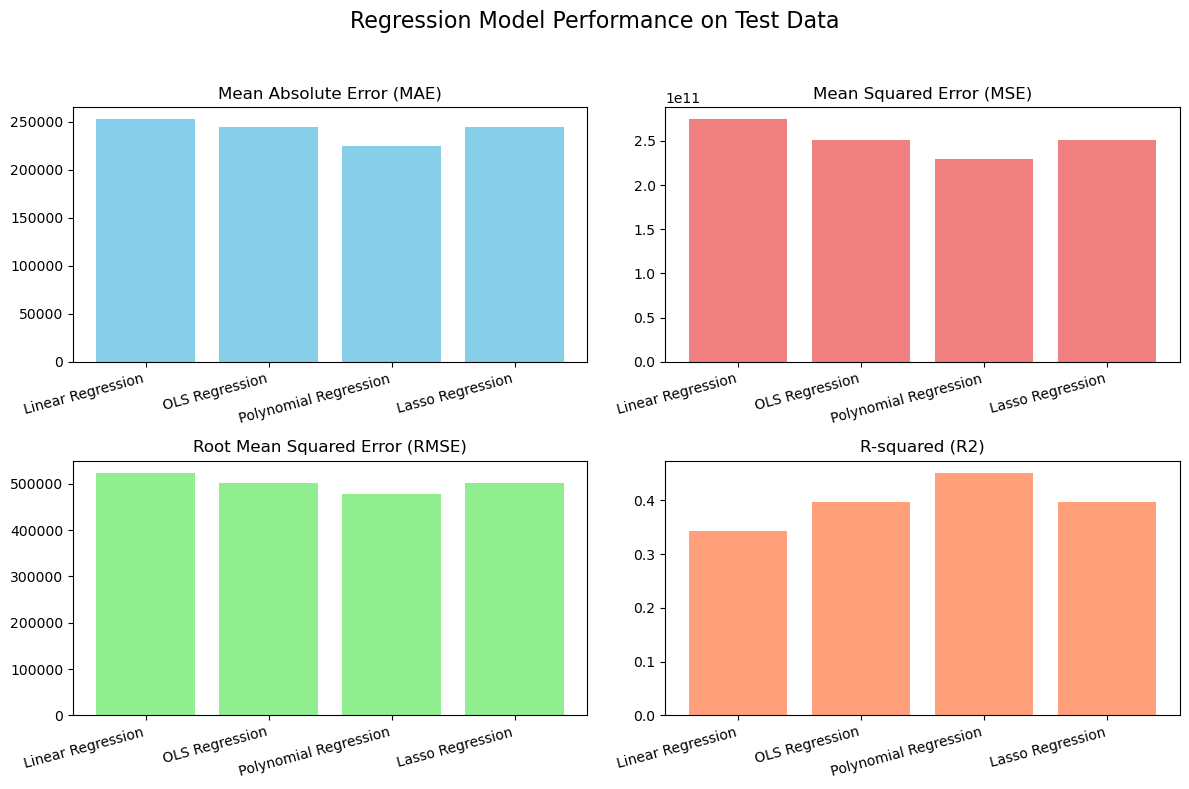

In [79]:
# Define the regression model names and their corresponding metrics
models = ["Linear Regression", "OLS Regression", "Polynomial Regression", "Lasso Regression"]
mae_scores = [linear_reg_mae_test, ols_mae_test, poly_reg_mae_test, lasso_reg_mae_test]
mse_scores = [linear_reg_mse_test, ols_mse_test, poly_reg_mse_test, lasso_reg_mse_test]
rmse_scores = [linear_reg_rmse_test, ols_rmse_test, poly_reg_rmse_test, lasso_reg_rmse_test]
r2_scores = [linear_reg_r2_test, ols_r2_test, poly_reg_r2_test, lasso_reg_r2_test]

# Create subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Regression Model Performance on Test Data", fontsize=16)

# MAE Plot
axs[0, 0].bar(models, mae_scores, color='skyblue')
axs[0, 0].set_title('Mean Absolute Error (MAE)')

# MSE Plot
axs[0, 1].bar(models, mse_scores, color='lightcoral')
axs[0, 1].set_title('Mean Squared Error (MSE)')

# RMSE Plot
axs[1, 0].bar(models, rmse_scores, color='lightgreen')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')

# R2 Plot
axs[1, 1].bar(models, r2_scores, color='lightsalmon')
axs[1, 1].set_title('R-squared (R2)')

# Rotate the x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


In [61]:
#Finding mean of the "logerror" 

# Load the CSV file into a DataFrame
df = pd.read_csv("pro_pred_2017_merged.csv")

# Calculate the mean of the "logerror" column
logerror_mean = df["logerror"].mean()

# Print the mean
print("Mean of logerror:", logerror_mean)


Mean of logerror: 0.01816547709111337


A mean logerror value of 0.0182 suggests that, on average, the predictions (property values) in the dataset tend to be slightly higher or lower than the actual property values by this amount. It indicates the overall accuracy or bias of the predictions.

If the mean logerror is close to zero, it implies that, on average, the predictions are very close to the actual values.
If the mean logerror is positive, it suggests a systematic overestimation of property values.
If the mean logerror is negative, it suggests a systematic underestimation of property values.

To compare my prediction model with the mean logerror, can use the mean logerror as a baseline or reference point. The goal is to assess whether our model performs better or worse than this baseline. Steps to do it:

Calculate Model Logerror: First, use our prediction model to make predictions on our dataset. We will have a set of predicted logerror values based on our model's predictions.

Calculate Mean of Model Logerror: Calculate the mean of the logerror values generated by our model. This is similar to how we calculated the mean logerror for the entire dataset.

Compare Model Logerror Mean to Dataset Mean: Compare the mean logerror of our model to the mean logerror of the entire dataset (the baseline mean). We can use metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) to quantify the difference between the two means.